In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import torch
import sklearn

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")

In [3]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
train = train.dropna()
test = test.dropna()

In [5]:
train_target = train.Survived
train_features = train[["Age", "SibSp", "Parch", "Fare"]]
test_features = test[["Age", "SibSp", "Parch", "Fare"]]

In [6]:
test_features

,Age,SibSp,Parch,Fare
12,23.0,1,0,82.2667
14,47.0,1,0,61.1750
24,48.0,1,3,262.3750
26,22.0,0,1,61.9792
28,41.0,0,0,30.5000
...,...,...,...,...
404,43.0,1,0,27.7208
405,20.0,0,0,13.8625
407,50.0,1,1,211.5000
411,37.0,1,0,90.0000


In [7]:
train_target

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

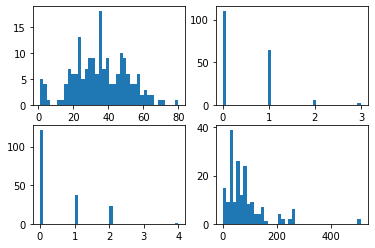

In [8]:
fig, axes = plt.subplots(2,2)
for i, ax in enumerate(axes.flat):
    ax.hist(train_features.iloc[:,i], bins=40)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [34]:
X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, test_size=0.5, random_state=0)
res = GaussianNB()
NNb = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree').fit(X_train, y_train)
res.fit(X_train, y_train)

GaussianNB()

In [35]:
print(NNb.score(X_train, y_train))

0.7582417582417582


In [36]:
print(NNb.score(X_test, y_test))

0.6739130434782609


In [37]:
print(res.score(X_test, y_test))
print(res.score(X_train, y_train))

0.5108695652173914
0.6153846153846154


In [234]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion='entropy',max_depth=5, max_features='sqrt', min_samples_leaf=4)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4)

In [235]:
print(rf.score(X_test, y_test))
print(rf.score(X_train, y_train))

0.75
0.7802197802197802
